## Project 3 - Chicago Crime Analysis 

### Loading data, imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv(r'C:\Users\o2bgo\Downloads\Crimes_-_2001_to_Present_20240907.csv')

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [4]:
df = df.drop(['X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude','Longitude', 'IUCR','Case Number', 'ID'], axis=1)
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Location
0,03/18/2015 12:00:00 PM,0000X W WACKER DR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN
1,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN
2,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN
3,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN
4,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN


In [5]:
df = df.drop(['Ward', 'Beat', 'FBI Code', 'Description', 'Domestic','Location'], axis=1)
df.head()

,Date,Block,Primary Type,Location Description,Arrest,District,Community Area
0,03/18/2015 12:00:00 PM,0000X W WACKER DR,DECEPTIVE PRACTICE,BANK,False,1.0,32.0
1,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,DECEPTIVE PRACTICE,APARTMENT,False,25.0,19.0
2,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,NaN,False,8.0,63.0
3,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,OTHER OFFENSE,RESIDENCE,False,17.0,14.0
4,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,DECEPTIVE PRACTICE,RESIDENCE,False,22.0,71.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147943 entries, 0 to 8147942
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   Primary Type          object 
 3   Location Description  object 
 4   Arrest                bool   
 5   District              float64
 6   Community Area        float64
dtypes: bool(1), float64(2), object(4)
memory usage: 380.8+ MB


In [7]:
date_format = "%m/%d/%Y %H:%M:%S %p"

df['Datetime'] = pd.to_datetime(df['Date'], format=date_format)

In [8]:
df = df.drop('Date', axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147943 entries, 0 to 8147942
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Block                 object        
 1   Primary Type          object        
 2   Location Description  object        
 3   Arrest                bool          
 4   District              float64       
 5   Community Area        float64       
 6   Datetime              datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), object(3)
memory usage: 380.8+ MB


In [10]:
df = df.set_index('Datetime')

In [11]:
df = df.sort_values('Datetime')
df.head()

,Block,Primary Type,Location Description,Arrest,District,Community Area
Datetime,,,,,,
2001-01-01 01:00:00,032XX N SHEFFIELD AV,THEFT,TAVERN/LIQUOR STORE,False,19.0,NaN
2001-01-01 01:00:00,025XX W ROOSEVELT RD,WEAPONS VIOLATION,STREET,False,11.0,NaN
2001-01-01 01:00:00,109XX S MICHIGAN AV,MOTOR VEHICLE THEFT,STREET,False,5.0,NaN
2001-01-01 01:00:00,023XX S TROY ST,CRIMINAL DAMAGE,STREET,False,10.0,NaN
2001-01-01 01:00:00,016XX N HUMBOLDT BL,THEFT,STREET,False,14.0,NaN


### Crimes Per District in 2022

In [12]:
ts_2022 = df.loc['2022']
ts_2022

,Block,Primary Type,Location Description,Arrest,District,Community Area
Datetime,,,,,,
2022-01-01 01:00:00,007XX E 114TH ST,CRIMINAL DAMAGE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,5.0,50.0
2022-01-01 01:00:00,006XX N CLARK ST,MOTOR VEHICLE THEFT,PARKING LOT / GARAGE (NON RESIDENTIAL),False,18.0,8.0
2022-01-01 01:00:00,008XX W 75TH ST,MOTOR VEHICLE THEFT,STREET,False,6.0,71.0
2022-01-01 01:00:00,029XX N HAMLIN AVE,OTHER OFFENSE,STREET,False,25.0,21.0
2022-01-01 01:00:00,010XX W NORTH AVE,THEFT,OTHER (SPECIFY),False,18.0,7.0
...,...,...,...,...,...,...
2022-12-31 12:50:00,018XX S HAMLIN AVE,ASSAULT,APARTMENT,False,10.0,29.0
2022-12-31 12:50:00,070XX S GREEN ST,ASSAULT,APARTMENT,False,7.0,68.0
2022-12-31 12:52:00,010XX S WESTERN AVE,BATTERY,BARBERSHOP,False,11.0,28.0


In [37]:
ts_2022.isna().sum()

Block                     0
Primary Type              0
Location Description    958
Arrest                    0
District                  0
Community Area            0
dtype: int64

In [18]:
ts_dis = ts_2022.groupby('District').size().sort_values(ascending=False)
ts_dis

District
8.0     14842
6.0     14732
12.0    14381
4.0     13977
11.0    13510
1.0     13086
18.0    12471
19.0    12299
25.0    11987
3.0     11939
2.0     11819
9.0     10391
7.0     10333
10.0     9999
5.0      9811
16.0     9263
24.0     8490
15.0     8319
14.0     8175
22.0     7696
17.0     7007
20.0     4975
31.0       15
dtype: int64

C:\Users\o2bgo\AppData\Local\Temp\ipykernel_1144\2376917862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='District', data=ts_2022, palette='viridis')


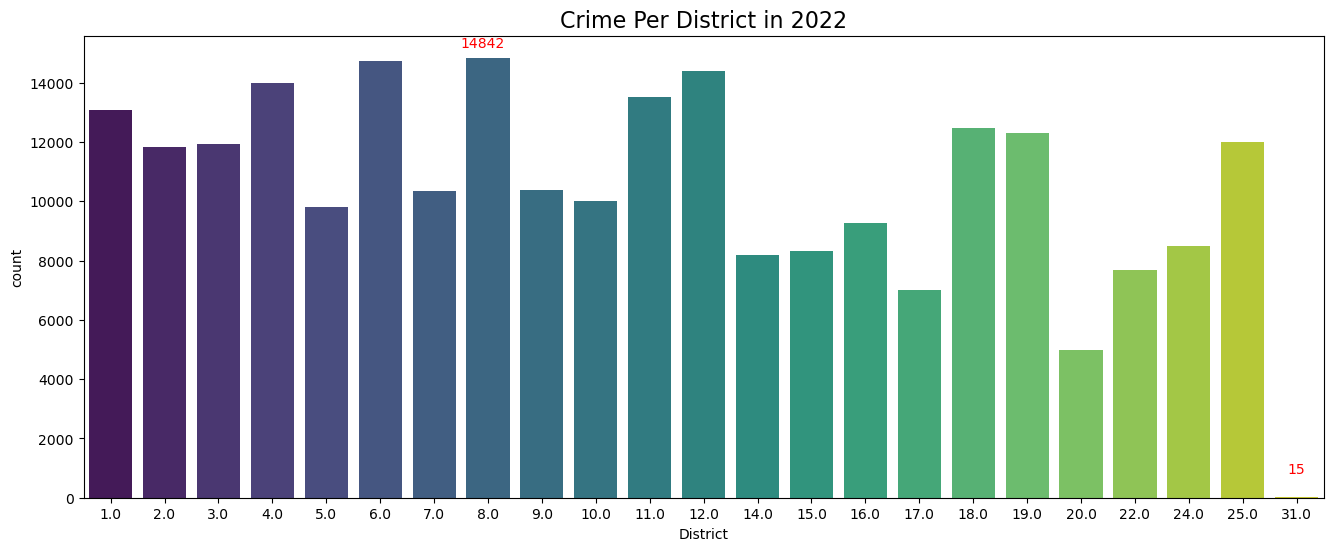

In [36]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='District', data=ts_2022, palette='viridis')
plt.title('Crime Per District in 2022', fontsize=16)

# Annotate highest value
max_district = ts_2022['District'].value_counts().idxmax()
max_count = ts_2022['District'].value_counts().max()
ax.annotate(f'{max_count}', xy=(int(max_district) - 1.1, max_count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='red')

# Annotate lowest value
min_district = ts_2022['District'].value_counts().idxmin()
min_count = ts_2022['District'].value_counts().min()

# Find the position of the minimum district
min_district_pos = ts_2022['District'].value_counts().index.get_loc(min_district)
ax.annotate(f'{min_count}', xy=(min_district_pos, min_count), xytext=(0, 15), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='red')


plt.show()

*The plot shows that during 2022 District 8 had the highest number of crimes with 14,842 and District 31 had the lowest number of recorded crimes with 15.* 

### Crimes Across the Years:

In [46]:
df['Year']  = df.index.year
df = df.loc[:'2023'].copy()


In [53]:
df['Year'].count()

7977860

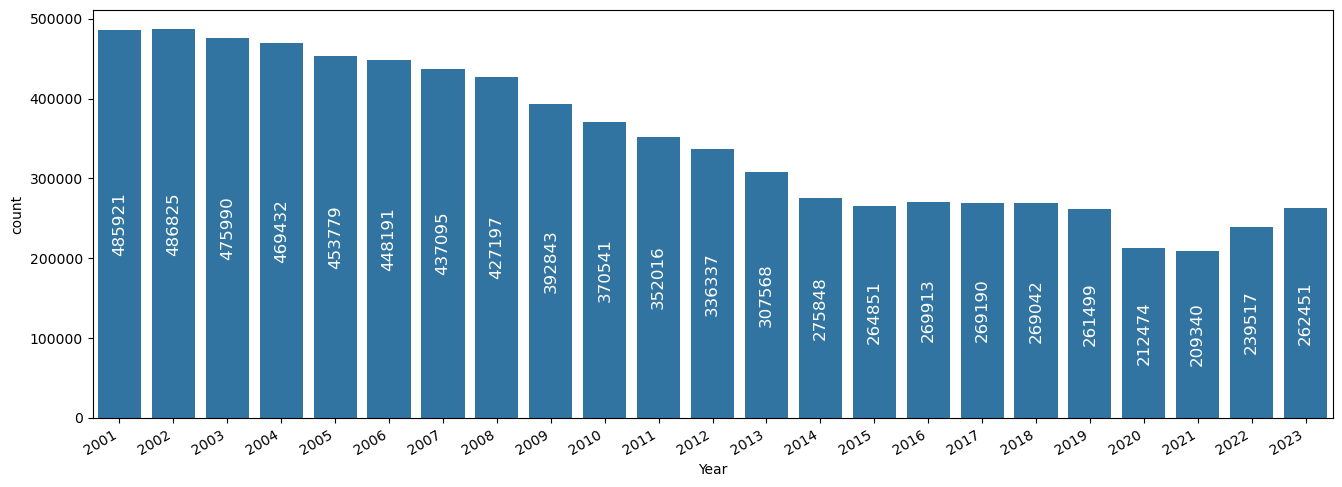

In [58]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=df, x='Year')

for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center', xytext=(0, 0), textcoords='offset points', rotation=90, color='white', fontsize=12)

fig = ax.get_figure()
fig.autofmt_xdate()

*The year 2002 had the highest number of crimes recorded with 486,825 while the year 2021 had the lowest with 209,340.*

In [72]:
df2 = df.groupby('Year').size().reset_index(name='Count')
df2.set_index('Year')

,Count
Year,
2001,485921
2002,486825
2003,475990
2004,469432
2005,453779
2006,448191
2007,437095
2008,427197
2009,392843


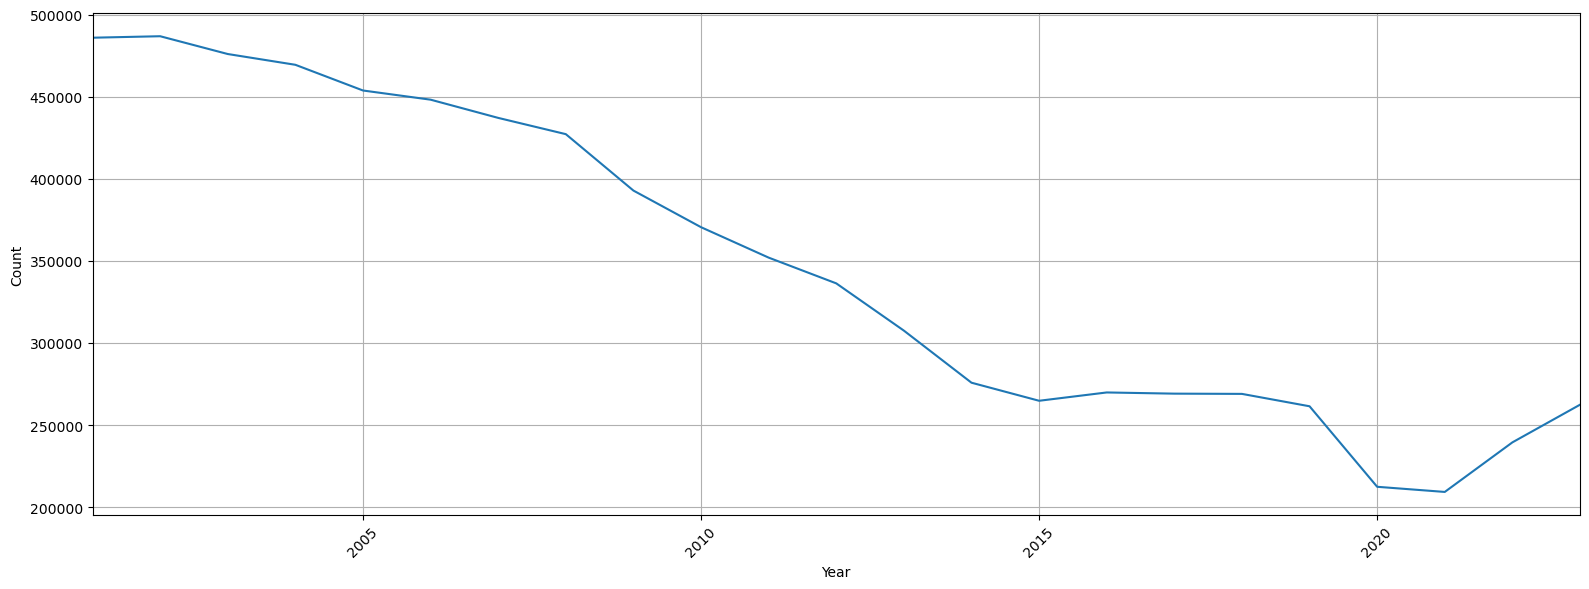

In [122]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df2, x='Year', y='Count')

ax.set_xticks(ax.get_xticks())

plt.xticks(rotation=45)

ax.grid(True)
plt.margins(x=0)
plt.tight_layout()
plt.show()


*The plot shows that the number of crimes decreased stedily between 2001 and 2020, then stagnated and started increasing again.*

#### Crime types accross the years 

In [77]:
crime_counts = df['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts.style.bar('Total # of Crimes')

,Total # of Crimes
Primary Type,
THEFT,1684544
BATTERY,1455152
CRIMINAL DAMAGE,909006
NARCOTICS,751735
ASSAULT,523743
OTHER OFFENSE,494929
BURGLARY,429732
MOTOR VEHICLE THEFT,395849
DECEPTIVE PRACTICE,359361


In [79]:
df.groupby('Primary Type').size().head()

Primary Type
ARSON                                  13634
ASSAULT                               523743
BATTERY                              1455152
BURGLARY                              429732
CONCEALED CARRY LICENSE VIOLATION       1224
dtype: int64

In [81]:
crime_list = df['Primary Type'].unique()
crime_list

array(['THEFT', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT',
       'CRIMINAL DAMAGE', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'GAMBLING',
       'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'OTHER OFFENSE', 'NARCOTICS', 'ASSAULT',
       'BURGLARY', 'DECEPTIVE PRACTICE', 'LIQUOR LAW VIOLATION',
       'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [86]:
CRIMES = {}
#Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("YE").size().interpolate() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['THEFT', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'GAMBLING', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION', 'OTHER OFFENSE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [88]:
crimes_df = pd.DataFrame(CRIMES)


,THEFT,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,CRIMINAL DAMAGE,BATTERY,CRIM SEXUAL ASSAULT,GAMBLING,SEX OFFENSE,OFFENSE INVOLVING CHILDREN,PUBLIC PEACE VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,99284,4278,27555,55863,93467,1776.0,934,2238,2265,2750,...,8.0,1.0,19,6,9,1,NaN,NaN,NaN,NaN
2002-12-31,98334,4282,25121,55942,94153,1804.0,971,2173,2597,2457,...,2.0,NaN,26,5,8,0,NaN,NaN,NaN,NaN
2003-12-31,98876,4211,22749,55011,88380,1568.0,1088,2078,3047,2430,...,2.0,NaN,16,2,6,0,1.0,NaN,NaN,NaN
2004-12-31,95464,4298,22805,53164,87136,1530.0,1122,1805,3103,2495,...,1.0,NaN,13,9,9,0,0.0,NaN,NaN,NaN
2005-12-31,85684,4106,22497,54548,83964,1516.0,1078,1817,2909,2730,...,2.0,NaN,19,9,4,0,0.0,NaN,NaN,NaN
2006-12-31,86241,3821,21818,57124,80666,1437.0,1368,1576,2787,3068,...,7.0,NaN,17,9,4,0,0.0,NaN,NaN,NaN
2007-12-31,85156,3554,18573,53749,79593,1506.0,1409,1530,2919,3315,...,1.0,NaN,12,12,5,0,0.0,NaN,NaN,NaN
2008-12-31,88437,3877,18881,52843,75930,1508.0,1199,1503,2667,3013,...,0.0,NaN,13,12,4,0,0.0,NaN,NaN,NaN
2009-12-31,80976,4159,15482,47725,68458,1393.0,991,1268,2634,3147,...,0.0,NaN,21,7,10,0,1.0,NaN,NaN,NaN


In [95]:
crimes_df['Overall'] = crimes_df.sum(axis=1)
crimes_df

,THEFT,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,CRIMINAL DAMAGE,BATTERY,CRIM SEXUAL ASSAULT,GAMBLING,SEX OFFENSE,OFFENSE INVOLVING CHILDREN,PUBLIC PEACE VIOLATION,...,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL,Overall
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,99284,4278,27555,55863,93467,1776.0,934,2238,2265,2750,...,1.0,19,6,9,1,NaN,NaN,NaN,NaN,485921.0
2002-12-31,98334,4282,25121,55942,94153,1804.0,971,2173,2597,2457,...,NaN,26,5,8,0,NaN,NaN,NaN,NaN,486825.0
2003-12-31,98876,4211,22749,55011,88380,1568.0,1088,2078,3047,2430,...,NaN,16,2,6,0,1.0,NaN,NaN,NaN,475990.0
2004-12-31,95464,4298,22805,53164,87136,1530.0,1122,1805,3103,2495,...,NaN,13,9,9,0,0.0,NaN,NaN,NaN,469432.0
2005-12-31,85684,4106,22497,54548,83964,1516.0,1078,1817,2909,2730,...,NaN,19,9,4,0,0.0,NaN,NaN,NaN,453779.0
2006-12-31,86241,3821,21818,57124,80666,1437.0,1368,1576,2787,3068,...,NaN,17,9,4,0,0.0,NaN,NaN,NaN,448191.0
2007-12-31,85156,3554,18573,53749,79593,1506.0,1409,1530,2919,3315,...,NaN,12,12,5,0,0.0,NaN,NaN,NaN,437095.0
2008-12-31,88437,3877,18881,52843,75930,1508.0,1199,1503,2667,3013,...,NaN,13,12,4,0,0.0,NaN,NaN,NaN,427197.0
2009-12-31,80976,4159,15482,47725,68458,1393.0,991,1268,2634,3147,...,NaN,21,7,10,0,1.0,NaN,NaN,NaN,392843.0


In [97]:
# Calculate percentage change using pct_change
percentage_changes = crimes_df.pct_change(periods=len(crimes_df)-1, axis=0).iloc[-1]

# Filter for non-decreasing crimes (including 0% change)
non_decreasing_crimes = percentage_changes[percentage_changes >= 0].index.tolist()

# Create a DataFrame with the selected crimes and the 'overall' column
crimes_dec = crimes_df[non_decreasing_crimes + ['Overall']]

C:\Users\o2bgo\AppData\Local\Temp\ipykernel_1144\1615189671.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percentage_changes = crimes_df.pct_change(periods=len(crimes_df)-1, axis=0).iloc[-1]


In [98]:
crimes_dec

,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,INTERFERENCE WITH PUBLIC OFFICER,STALKING,CRIMINAL SEXUAL ASSAULT,DOMESTIC VIOLENCE,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,Overall
Datetime,,,,,,,,,,
2001-12-31,4278,27555,14953,406,204,36,1.0,19,1,485921.0
2002-12-31,4282,25121,13738,361,200,33,NaN,26,0,486825.0
2003-12-31,4211,22749,13461,409,247,46,NaN,16,0,475990.0
2004-12-31,4298,22805,13257,531,215,52,NaN,13,0,469432.0
2005-12-31,4106,22497,13592,615,192,43,NaN,19,0,453779.0
2006-12-31,3821,21818,13611,758,186,50,NaN,17,0,448191.0
2007-12-31,3554,18573,14176,677,213,57,NaN,12,0,437095.0
2008-12-31,3877,18881,14935,580,190,58,NaN,13,0,427197.0
2009-12-31,4159,15482,13885,573,168,54,NaN,21,0,392843.0


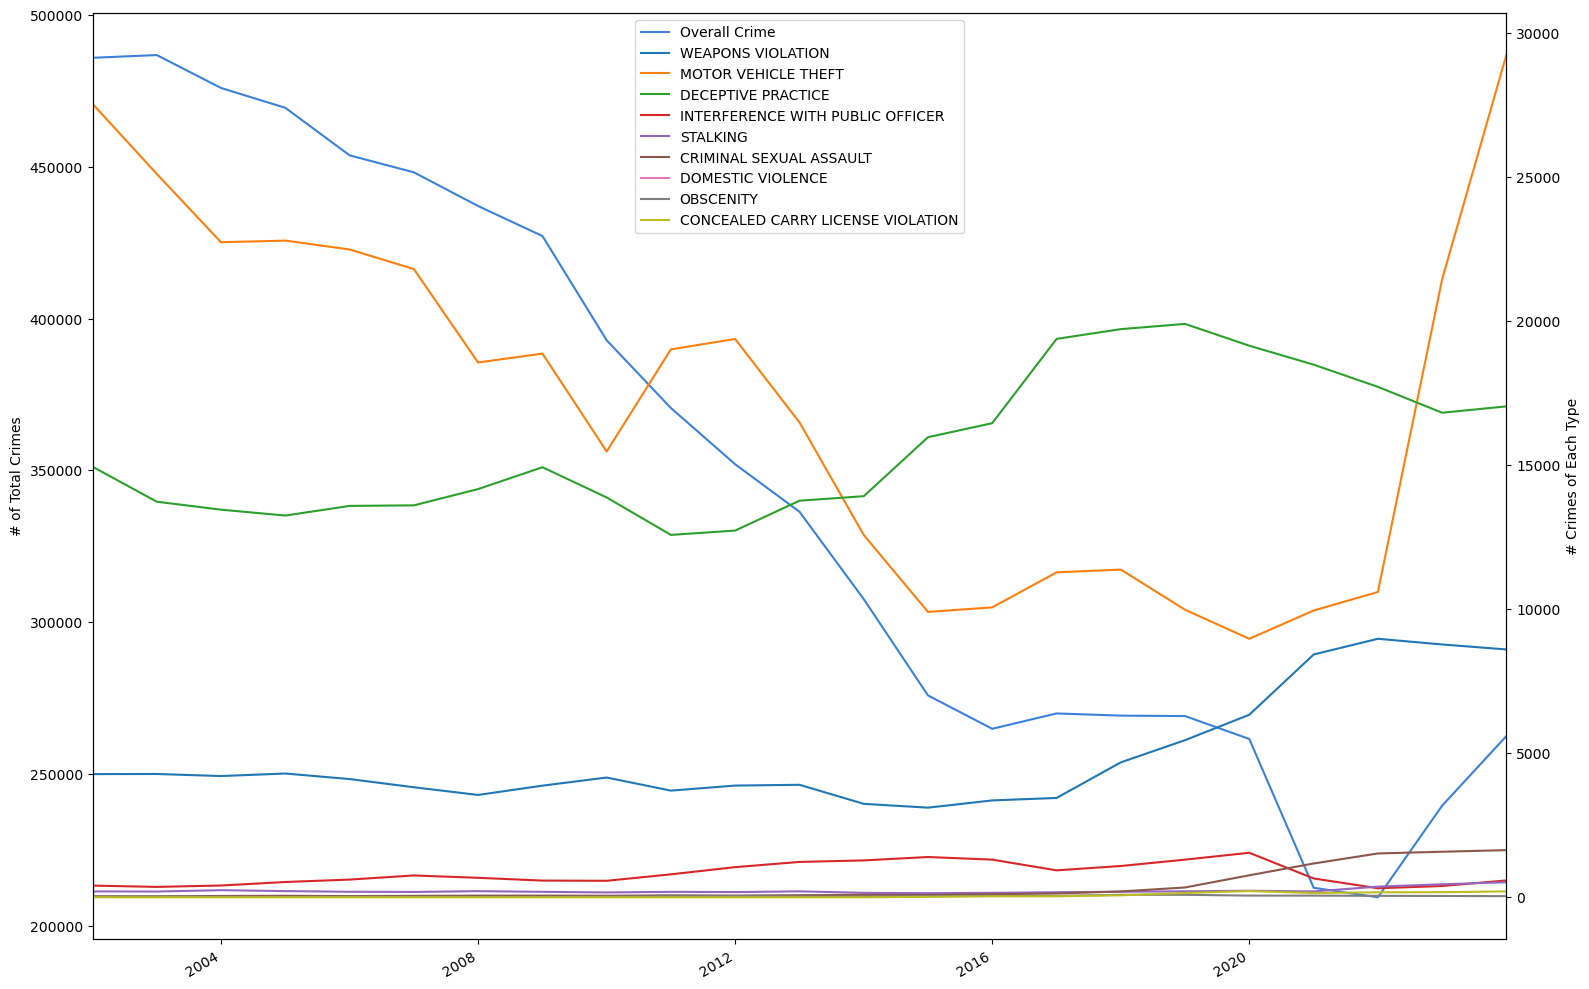

In [123]:
fig, ax1 = plt.subplots(figsize=(16,10))
ax1.plot(crimes_df.index, crimes_df['Overall'] ,color='#3b81db',label='Overall Crime')
ax1.set_ylabel("# of Total Crimes")
# Make twin axis
ax2 = ax1.twinx()
ax2.plot(crimes_df.index ,crimes_df[non_decreasing_crimes],label=non_decreasing_crimes)
ax2.set_ylabel("# Crimes of Each Type")
## Removing the grids
ax1.grid(False)
ax2.grid(False)
## Making joined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0);
fig.autofmt_xdate()
plt.margins(x=0)
plt.tight_layout()
plt.show()

* After determing which crime types did not decrease overtime like the overall number of crimes, thme plot shows how these crimes behave compared to the overall number of crimes.
* For example it shows that car theft has behaved similarly to the overall crime trends until 2016, before it stopped decreasing then started increasing again.
* The weapons violation crimes have remained almost the same between 2001 and 2017, then started increasing, unlike the overall number of crimes.
* Other crime types such as stalking, concealed carry license violations, and obscenities have a very small sample of cases that make it difficult to draw conclusions regarding their behavior.

### Checking Seasonality:


In [17]:
df2 = pd.read_csv(r'C:\Users\o2bgo\Downloads\Crimes_-_2001_to_Present_20240907.csv')

In [18]:
df2 = df2.drop(['X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude','Longitude', 'IUCR','Case Number', 'ID', 'Ward', 'Beat', 'FBI Code', 'Description', 'Domestic','Location', 'Community Area', 'District', 'Arrest', 'Location Description', 'Block'], axis=1)
df2.head()

,Date,Primary Type
0,03/18/2015 12:00:00 PM,DECEPTIVE PRACTICE
1,12/20/2018 03:00:00 PM,DECEPTIVE PRACTICE
2,05/01/2016 12:25:00 AM,DECEPTIVE PRACTICE
3,12/20/2018 04:00:00 PM,OTHER OFFENSE
4,06/01/2014 12:01:00 AM,DECEPTIVE PRACTICE


In [19]:
date_format = "%m/%d/%Y %H:%M:%S %p"

df2['Date'] = pd.to_datetime(df2['Date'], format=date_format)
df2 = df2.set_index('Date')
df2.head()

,Primary Type
Date,
2015-03-18 12:00:00,DECEPTIVE PRACTICE
2018-12-20 03:00:00,DECEPTIVE PRACTICE
2016-05-01 12:25:00,DECEPTIVE PRACTICE
2018-12-20 04:00:00,OTHER OFFENSE
2014-06-01 12:01:00,DECEPTIVE PRACTICE


In [20]:
df2 = df2.sort_values('Date')
df2.head()

,Primary Type
Date,
2001-01-01 01:00:00,THEFT
2001-01-01 01:00:00,WEAPONS VIOLATION
2001-01-01 01:00:00,MOTOR VEHICLE THEFT
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,THEFT


In [25]:

pivot_table = df2.pivot_table(index=df2.index, columns='Primary Type', aggfunc='size')

# Group by month and sum the values
monthly_counts = pivot_table.resample('M').sum()


C:\Users\o2bgo\AppData\Local\Temp\ipykernel_24280\86494014.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = pivot_table.resample('M').sum()


In [26]:
monthly_counts

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,0.0,162.0,3966.0,4.0,1192.0,1398.0,...,2800.0,563.0,0.0,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,0.0,134.0,3665.0,1.0,1063.0,1163.0,...,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,0.0,149.0,4618.0,5.0,1141.0,1313.0,...,2837.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7767.0,345.0
2001-04-30,89.0,2747.0,8328.0,1932.0,0.0,132.0,4922.0,2.0,1133.0,1200.0,...,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8889.0,1997.0,1.0,155.0,4758.0,2.0,1067.0,1261.0,...,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8421.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,33.0,1961.0,3784.0,599.0,14.0,0.0,2249.0,111.0,400.0,1256.0,...,1355.0,10.0,1.0,65.0,0.0,719.0,120.0,34.0,4518.0,667.0
2024-05-31,49.0,2280.0,4436.0,757.0,17.0,0.0,2404.0,126.0,396.0,1361.0,...,1498.0,26.0,2.0,74.0,0.0,783.0,125.0,45.0,5164.0,685.0
2024-06-30,46.0,2074.0,4281.0,619.0,22.0,0.0,2570.0,144.0,393.0,1296.0,...,1382.0,31.0,0.0,110.0,0.0,818.0,99.0,39.0,5440.0,763.0


In [27]:
# selecting the top five crimes to vizualize 
top_5 = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']
top_ts = monthly_counts[top_5].copy()
top_ts.head()

Primary Type,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
Date,,,,,
2001-01-31,7867.0,6527.0,3966.0,4714.0,2123.0
2001-02-28,6669.0,6042.0,3665.0,4369.0,2029.0
2001-03-31,7767.0,7662.0,4618.0,4862.0,2824.0
2001-04-30,7702.0,8328.0,4922.0,4044.0,2747.0
2001-05-31,8421.0,8889.0,4758.0,4038.0,2903.0


In [28]:
#converting floats to integrs
top_ts[top_5] = top_ts[top_5].astype(int)
top_ts.head()

Primary Type,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
Date,,,,,
2001-01-31,7867,6527,3966,4714,2123
2001-02-28,6669,6042,3665,4369,2029
2001-03-31,7767,7662,4618,4862,2824
2001-04-30,7702,8328,4922,4044,2747
2001-05-31,8421,8889,4758,4038,2903


In [29]:
top_ts.isna().sum()

Primary Type
THEFT              0
BATTERY            0
CRIMINAL DAMAGE    0
NARCOTICS          0
ASSAULT            0
dtype: int64

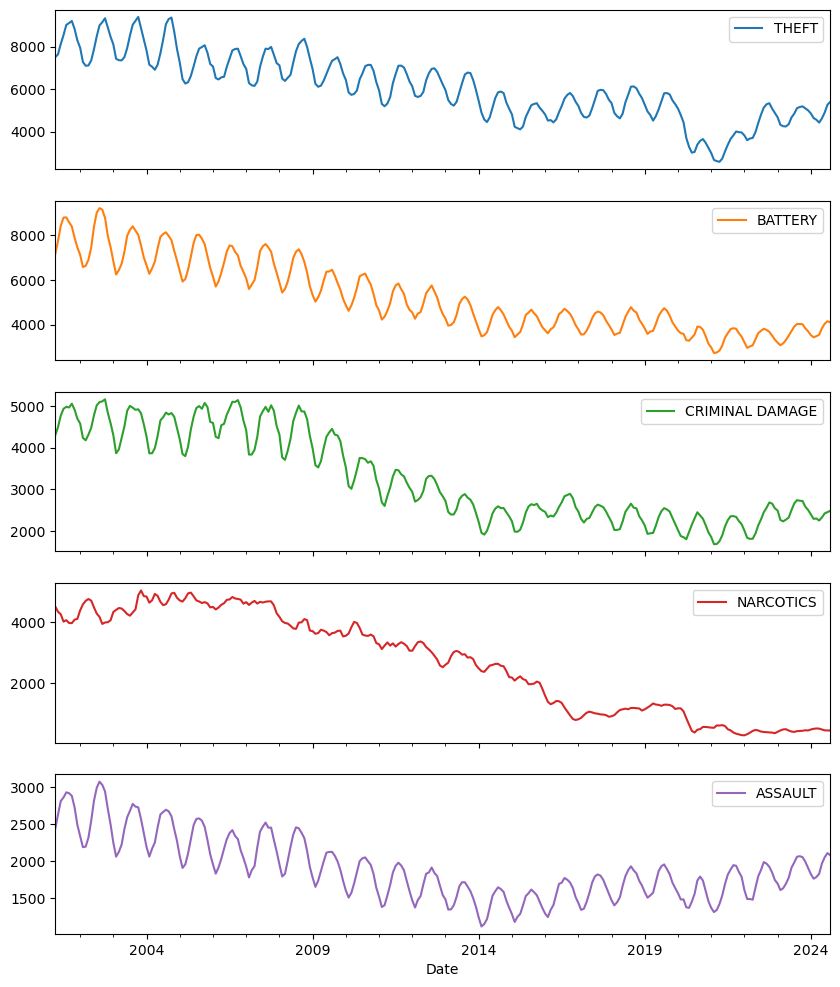

In [31]:
top_ts.rolling(4).mean().dropna().plot(subplots=True,figsize=(10,12));


*Looking at the top five crime types, we can see that all except narcotic-related crimes have fluctuations that can indicate seasonality to look at in more detail later on. It should be noted that cannabis consumption has been lagalized in Illinois(Chicago) which can explain the decline in narcotic crimes.* 

In [32]:
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from 'C:\\Users\\o2bgo\\anaconda3\\Lib\\site-packages\\statsmodels\\tsa\\api.py'>

In [33]:
crime_type = "THEFT"
ts_crime = top_ts[crime_type]
decomp = tsa.seasonal_decompose(ts_crime)
decomp

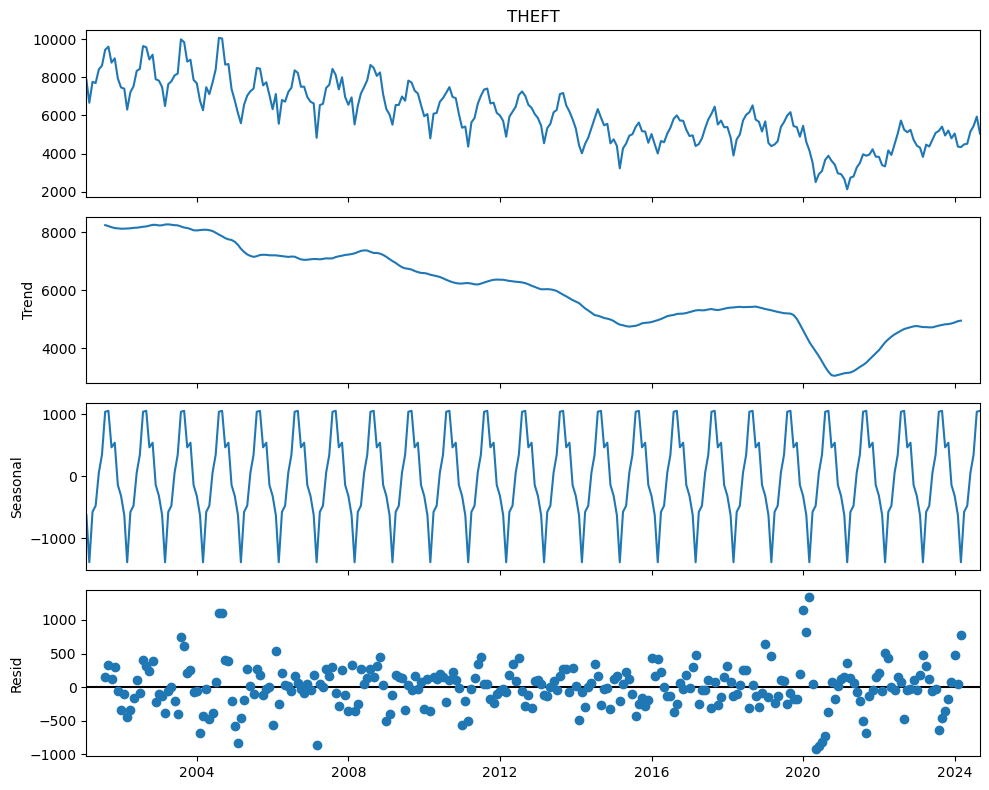

In [34]:
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [42]:
seasonal = decomp.seasonal

def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {crime_type}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.set_size_inches((30, 9))
    fig.autofmt_xdate(rotation=90, ha='center')
    
    return fig, ax

In [46]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [47]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2001-08-31', '2002-08-31', '2003-08-31', '2004-08-31',
               '2005-08-31', '2006-08-31', '2007-08-31', '2008-08-31',
               '2009-08-31', '2010-08-31', '2011-08-31', '2012-08-31',
               '2013-08-31', '2014-08-31', '2015-08-31', '2016-08-31',
               '2017-08-31', '2018-08-31', '2019-08-31', '2020-08-31',
               '2021-08-31', '2022-08-31', '2023-08-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [48]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('365 days 00:00:00')

In [49]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods

[Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

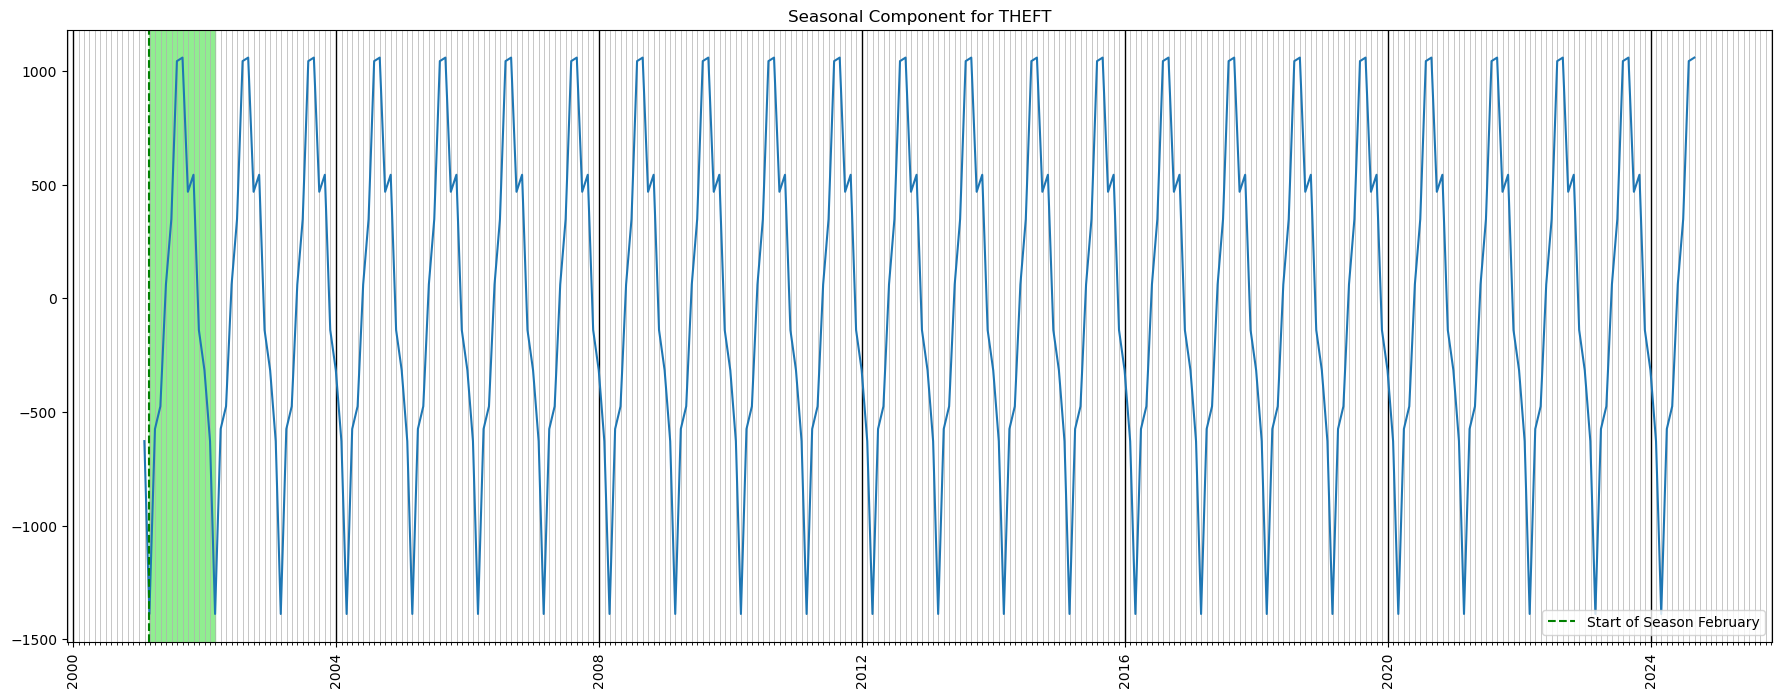

In [50]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

*A cycle in the season lasts for 365 days, which indicates that crimes fluctuate to a degree on an annual basis.*

In [52]:
seasonal.max() - seasonal.min()


2446.320652173913

*The analysis also shows that a season has a magnitude of a change in crime numbers of 2,446 theft crimes from the lowest point to the peak of each season.* 